In [1]:
using Turing
using StatsPlots

In [3]:
@model function gdemo(x, y)
  s² ~ InverseGamma(2, 3)
  m ~ Normal(0, sqrt(s²))
  x ~ Normal(m, sqrt(s²))
  y ~ Normal(m, sqrt(s²))
end

gdemo (generic function with 1 method)

In [4]:
chn = sample(gdemo(1.5, 2), HMC(0.1, 5), 1000)

Chains MCMC chain (1000×11×1 Array{Float64,3}):

Iterations        = 1:1:1000
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 5.19 seconds
Compute duration  = 5.19 seconds
parameters        = s², m
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse       ess      rhat   es ⋯
      Symbol   Float64   Float64    Float64   Float64   Float64   Float64      ⋯

          s²    2.1167    2.3021     0.0728    0.2566   73.5998    1.0183      ⋯
           m    1.0952    0.8478     0.0268    0.0720   92.6261    0.9993      ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          s²    0.5510    1.0372    1.5030    2.3591    7.2839
         

In [5]:
describe(chn)

2-element Array{ChainDataFrame,1}:
 Summary Statistics (2 x 8)
 Quantiles (2 x 6)

┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1278


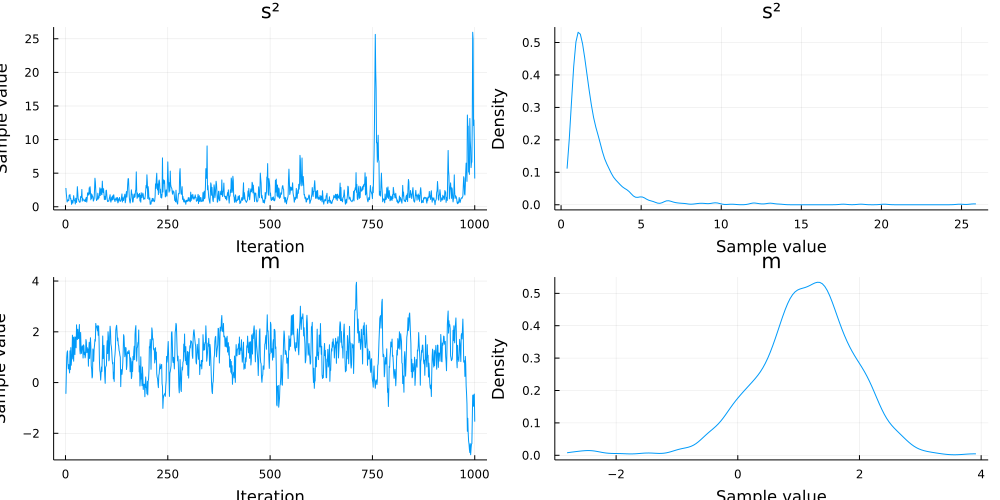

In [6]:
p = plot(chn)

In [2]:
using DataFrames
using CSV

In [3]:
df = DataFrame(CSV.File("../data/cars.csv"));

In [32]:
size(df)

(50, 3)

In [4]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,Column1,25.5,1,25.5,50,0,Int64
2,speed,15.4,4,15.0,25,0,Int64
3,dist,42.98,2,36.0,120,0,Int64


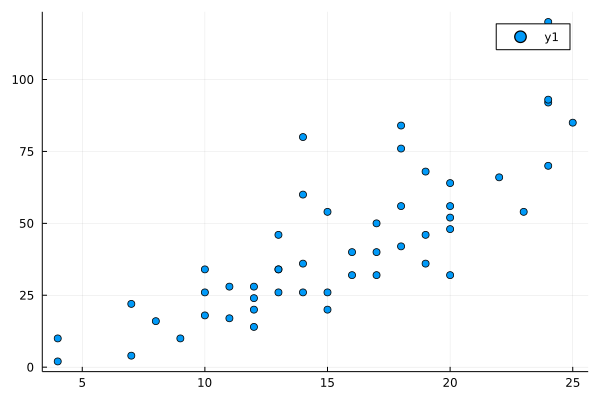

In [5]:
scatter(df.speed, df.dist)

In [9]:
@model function speed_dist(speed, dist)
    a ~ Uniform(-20, 20)
    b ~ Uniform(1, 5)
    m = a .+ b * speed
    dist ~ MvNormal(m, 1)
end

speed_dist (generic function with 1 method)

In [10]:
res = sample(speed_dist(df.speed, df.dist), NUTS(0.65), 1000)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/shmuma/.julia/packages/AdvancedHMC/bv9VV/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/shmuma/.julia/packages/AdvancedHMC/bv9VV/src/hamiltonian.jl:47
┌ Info: Found initial step size
│   ϵ = 0.0125
└ @ Turing.Inference /home/shmuma/.julia/packages/Turing/YGtAo/src/inference/hmc.jl:188
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/shmuma/.julia/packages/AdvancedHMC/bv9VV/src/hamiltonian.jl:47


Chains MCMC chain (1000×14×1 Array{Float64,3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 2.52 seconds
Compute duration  = 2.52 seconds
parameters        = a, b
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters       mean       std   naive_se      mcse        ess      rhat    ⋯
      Symbol    Float64   Float64    Float64   Float64    Float64   Float64    ⋯

           a   -17.5763    0.4716     0.0149    0.0172   246.1850    0.9999    ⋯
           b     3.9320    0.0291     0.0009    0.0010   250.7879    0.9995    ⋯
                                                                1 column omitted

Quantiles
  parameters       2.5%      25.0%      50.0%      75.0%      97.5% 
      Symbol    Float64    Float64    Float64    Float64    Float64 

  

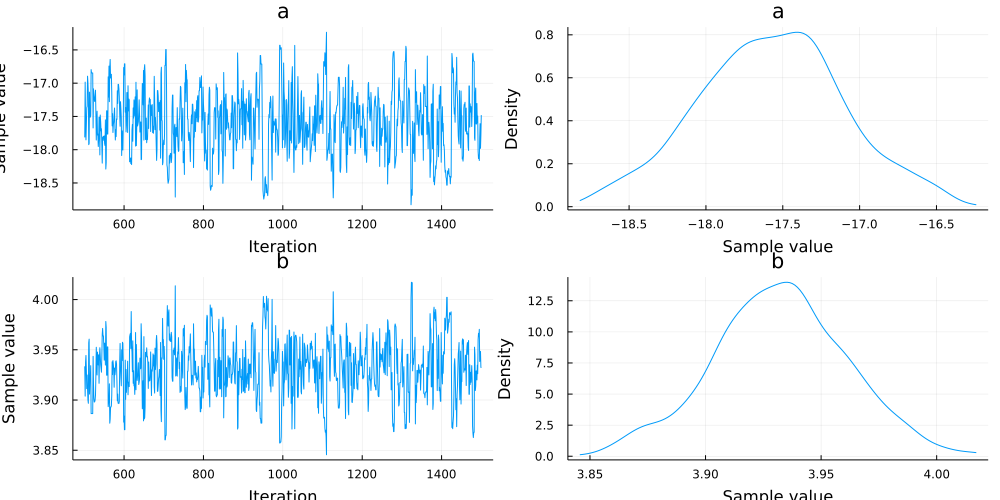

In [11]:
plot(res)

In [25]:
mvals = mean(res)

Mean
  parameters       mean 
      Symbol    Float64 

           a   -17.5763
           b     3.9320


In [28]:
resid = df.dist - (mvals[:a,:mean] .+ mvals[:b,:mean] * df.speed);

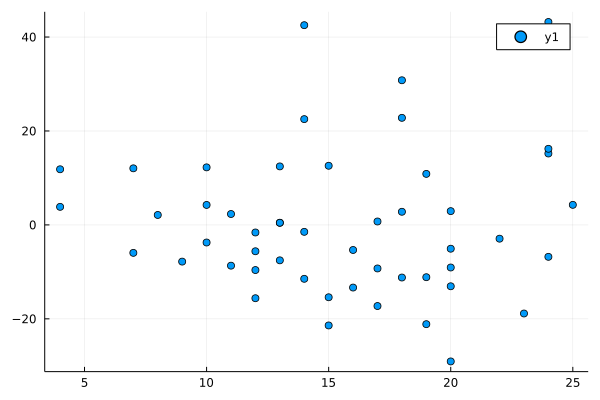

In [34]:
scatter(df.speed, resid)